<a href="https://colab.research.google.com/github/nagelex/dataa/blob/main/Classes_07_SVM_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification: Support Vector Machine

Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, balanced_accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid", palette="deep")

import io
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.svm import SVC
from sklearn.preprocessing import power_transform
from sklearn.pipeline import make_pipeline

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)

In [ ]:
# constans
test_size=0.2
random_state=42

In [ ]:
def compute_score_classification(y_true, y_pred):
  '''
  Helper function for printing scores.

  Parameters:
  y_true: ndarray of y values from original dataset.
  y_pred: ndarray of y values predicted with given model.

  Return:
  dictionary object that consists of accuracy and classification report.

  '''
  return {
        "Accuracy": f"{accuracy_score(y_true, y_pred):.3f}",
        "Classification Report": classification_report(y_true, y_pred),
}

## Load dataset

In [ ]:
df = pd.read_csv('data_neo-ffi_religion.csv')
df['Orthodoxy'] = np.log(df[['Orthodoxy']].to_numpy())
df.head()

,Extraversion,Agreeableness,Conscientiousness,Openness,Neuroticism,External Critique,Orthodoxy,Historical Relativism,Relativism,Second Naïveté
0,34.082439,46.043690,40.788554,461.110426,43.865868,2.838143,2.586507,3.744990,6.093860,4.458938
1,45.914894,45.968433,41.235290,401.384274,28.027017,3.824136,2.294873,3.392507,5.230517,3.269949
2,33.008654,42.065841,42.069170,390.193510,41.023889,2.288471,2.367948,3.765416,4.801786,4.683288
3,56.112153,45.903571,53.080369,468.518727,20.018578,5.824989,2.621076,2.826005,2.592473,0.883451
4,31.972346,49.009174,42.161417,508.686847,43.026028,4.038579,2.736421,4.689029,4.916692,4.627536


Inspect the dataset

In [ ]:
df.describe()

,Extraversion,Agreeableness,Conscientiousness,Openness,Neuroticism,External Critique,Orthodoxy,Historical Relativism,Relativism,Second Naïveté
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,37.811238,42.318673,41.208357,436.675828,36.042290,3.880765,2.581919,4.883313,5.299550,4.223002
std,8.871624,7.222606,8.104708,63.642560,11.014191,1.259730,1.129017,0.778776,0.944093,1.392345
min,14.040682,21.008399,16.904128,289.257541,12.942666,0.876634,0.816596,1.304512,1.905408,0.801310
25%,32.079634,37.959417,35.084398,388.849925,27.908735,3.046971,1.706643,4.430331,4.729321,3.169300
50%,38.954182,43.089033,41.052187,440.203497,35.908038,3.762668,2.411769,4.922857,5.437686,4.434408
75%,43.946449,47.078293,47.089308,480.501705,44.692161,4.684792,3.334454,5.373428,5.981834,5.213640
max,56.882820,59.121317,59.000430,572.957659,60.030339,6.935906,7.131491,6.877499,7.139185,7.151545


Create classes

In [ ]:
df['class'] = df[['External Critique', 'Historical Relativism', 'Relativism', 'Second Naïveté']].idxmax(axis=1)

In [ ]:
df.head()

,Extraversion,Agreeableness,Conscientiousness,Openness,Neuroticism,External Critique,Orthodoxy,Historical Relativism,Relativism,Second Naïveté,class
0,34.082439,46.043690,40.788554,461.110426,43.865868,2.838143,2.586507,3.744990,6.093860,4.458938,Relativism
1,45.914894,45.968433,41.235290,401.384274,28.027017,3.824136,2.294873,3.392507,5.230517,3.269949,Relativism
2,33.008654,42.065841,42.069170,390.193510,41.023889,2.288471,2.367948,3.765416,4.801786,4.683288,Relativism
3,56.112153,45.903571,53.080369,468.518727,20.018578,5.824989,2.621076,2.826005,2.592473,0.883451,External Critique
4,31.972346,49.009174,42.161417,508.686847,43.026028,4.038579,2.736421,4.689029,4.916692,4.627536,Relativism


## Exercise 1

Using the documentation, create simple SVM classification model: *class ~ Extraversion+ Agreeableness + Conscientiousness + Openness + Neuroticism*. Use [`SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) class from sci-kit learn and do not forget to scale your data.

1. Compare classification results when using three different kernels: linear, polynomial, and radial.
2. Play with different C values: try to create a model with **hard margins** and **soft margins**. Consider what C-values can represent soft and hard margins.

In [ ]:
# Your code
X = df[[
    'Extraversion',
    'Agreeableness',
    'Conscientiousness',
    'Openness',
    'Neuroticism']]
y = df[['class']]

df_transformed = df.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit (X_train, y_train)
y_pred = clf.predict(X_test)
compute_score_classification(y_test, y_pred)

scores =  compute_score_classification(y_test, y_pred)
print(scores ['Classification Report'])



                       precision    recall  f1-score   support

    External Critique       1.00      0.11      0.20         9
Historical Relativism       1.00      0.07      0.13        14
           Relativism       0.52      1.00      0.69        35
       Second Naïveté       0.00      0.00      0.00        11

             accuracy                           0.54        69
            macro avg       0.63      0.30      0.25        69
         weighted avg       0.60      0.54      0.40        69



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precisio

## Exercise 2

When you created the KNN, DT, or SVC models - most of the code (actually all of it, except for the line defining the model) was the same. This is quite a waste of time and space. It also makes it difficult to read, analyze, and refactor the code. The [`Pipelines`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) framework was created exactly for such situations. As sugested by the name, `Pipeline` is a pipe of transforms (functions that somehow transform the data) with a final estimator at the end. According to the documentation, intermediate steps of the pipeline must be *transforms*, that is, they must implement `fit` and `transform` methods (e.g., `StandardScaler`). The final estimator only needs to implement `fit` (e.g., `KNeighborsClassifier`). When you create a pipeline, you can think of this pipeline as a model - in fact, individual data processing steps are already a model, such as scaler, because they often learn from data.

For the sake of simplicity, we'll start with the [`make_pipeline()`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html#sklearn.pipeline.make_pipeline) function, which conveniently allows you to create a pipeline. Take a look at the example below:

```
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))
model.fit(X,y)
y_pred = model.predict(X)
```

Again, create SVC lassifiers, but this time:
1. Define classification estimators beforehand and put them in a list;
2. Use a for loop to ...
3. ... make pipeline that chain scaler with estimator using `make_pipeline()` function.

In [ ]:
# Your code
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

estimators = [
    ('SVM with RBF Kernel', SVC(gamma='auto'))
 ]

for name, estimator in estimators:
  model = make_pipeline(StandardScaler(), estimators)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
  clf.fit (X_train, y_train)
  y_pred = clf.predict(X_test)

scores = classification_report(y_test, y_pred)
print(f'Classification Report for {name}:\n{scores}\n')

Classification Report for SVM with RBF Kernel:
                       precision    recall  f1-score   support

    External Critique       1.00      0.11      0.20         9
Historical Relativism       1.00      0.07      0.13        14
           Relativism       0.52      1.00      0.69        35
       Second Naïveté       0.00      0.00      0.00        11

             accuracy                           0.54        69
            macro avg       0.63      0.30      0.25        69
         weighted avg       0.60      0.54      0.40        69




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precisio

## Homework:

From the theory of SVM we know, that the kernel and C choice should influence the shape of decision boundaries. Let's see it with our own eyes.

To do so, we can use `DecisionBoundaryDisplay.from_estimator()` for plotting the decision boundary of given (fitted) estimator. Example:



```
classifier = SVC(kernel='rbf', C=100000).fit(X, y)
disp = DecisionBoundaryDisplay.from_estimator(
    classifier,
    X,
    response_method="predict",
    xlabel=label_of_the_first_feature,
    ylabel=label_of_the_second_feature,
    alpha=0.5,
)
```
On a scaled data, my output is more or less like this:

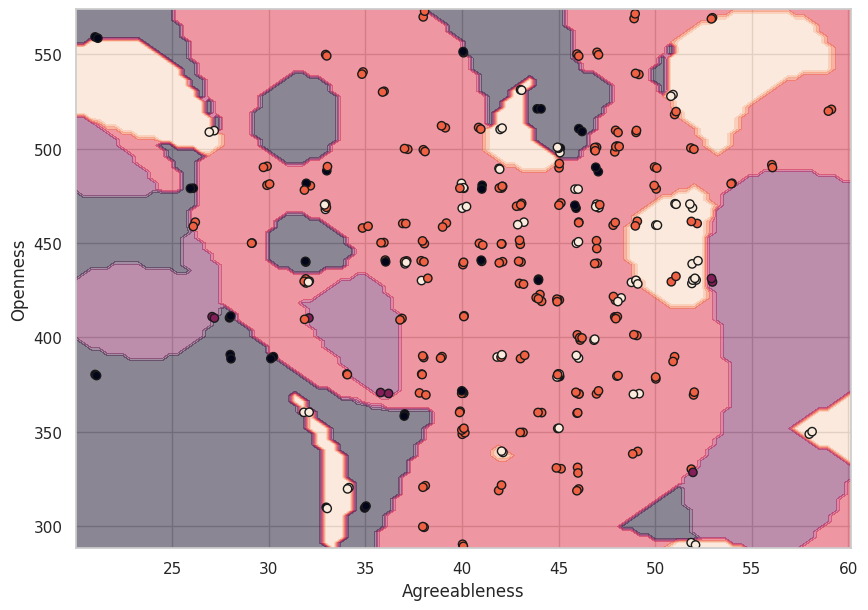

Note, that to use `DecisionBoundaryDisplay.from_estimator()` method we can use only two features during the fitting (to plot the boundaries in 2D plot).

The overall strategy will be as follows:

1. Choose two features from our set of five Big Five features (e.g. Openness and Agreeableness);
2. Encode y set. Until now the value of our y was a simple string (e.g. 'Relativism'). For convenient plotting of our boundaries and original data, we need our categorical y to be encoded as numbers (e.g. 0,1,2,3 and 4). You can use e.g. `LabelEncoder()` class. It implements classical `fit()-transform() `API, so you can `fit()` and `transform() `your y data;
3. Create train and tests datasets from X and encoded y;
4. Scale features dataset. You can do this 'manually' or use make_pipeline() function;
5. For 6 SVC models (3 kernels x 3 C), create DecisionBoundaryDisplay() based on the code and documentation provided. You can display decision boundaries for both training and test sets, or select just one set. For 'poly' kernel you can either pick the default degree = 3 or test a higher degree;
6. Do not forget to add the original data as scatterplot (see exaples in the sklearn documentation) to the DecisionBoundaryDisplay(), to compare decision boundaries with the placement of the original data;
7. In your report include generated plots and comment both on the appearance of decision boundaries depending on the kernel chosen and the effect of margin softness on these boundaries.
8. If you want, you can check whether the boundaries differ when svm is trained on scaled and unscaled data.


/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'scatter_kwargs', 'show_title'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


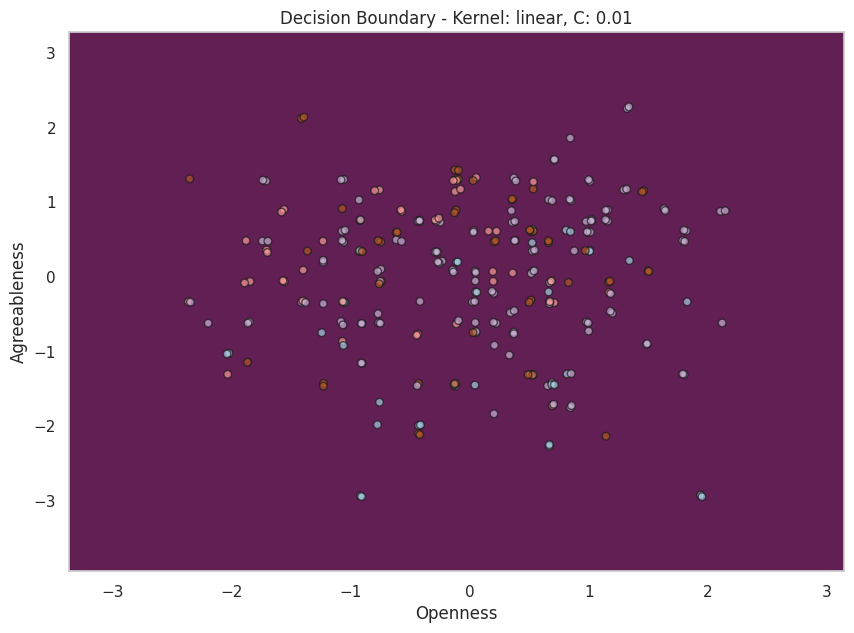

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'scatter_kwargs', 'show_title'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


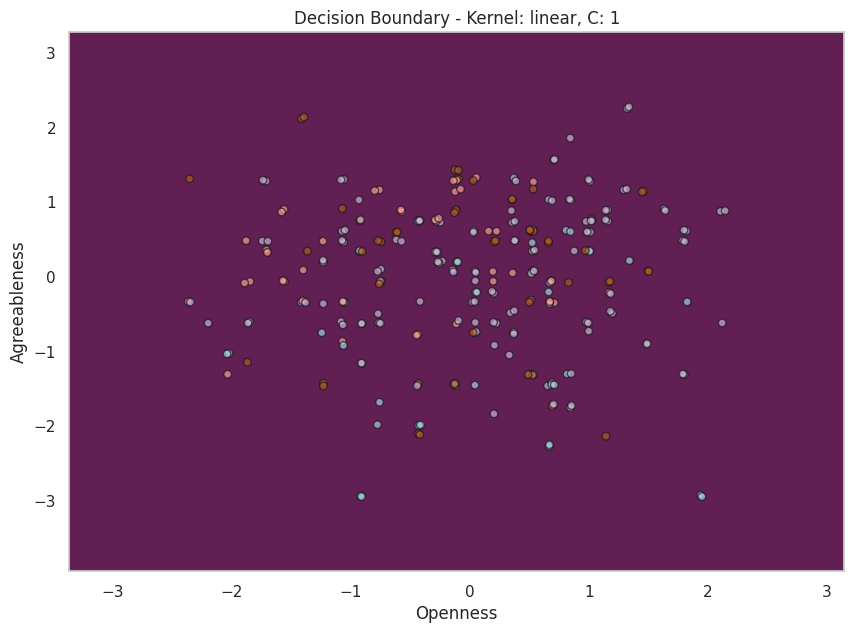

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'scatter_kwargs', 'show_title'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


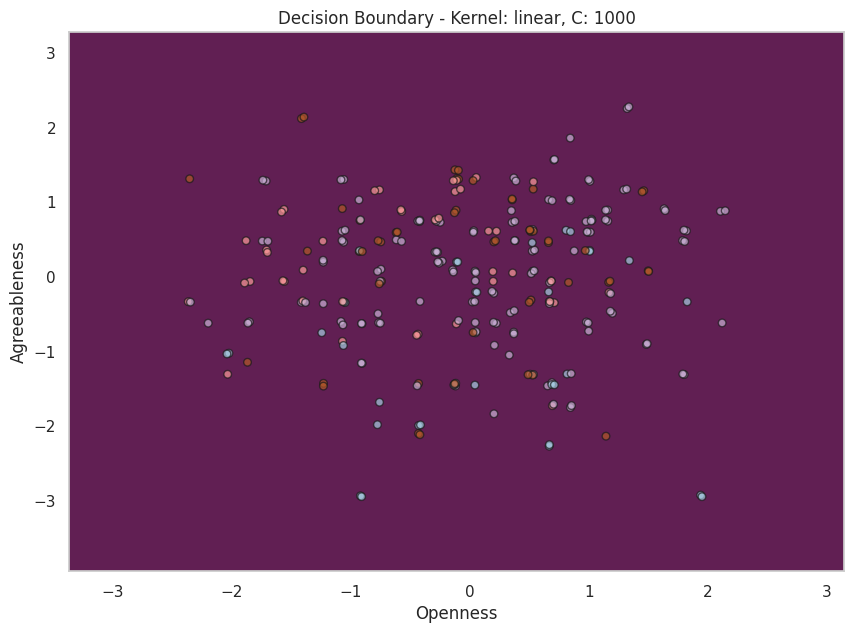

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'scatter_kwargs', 'show_title'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


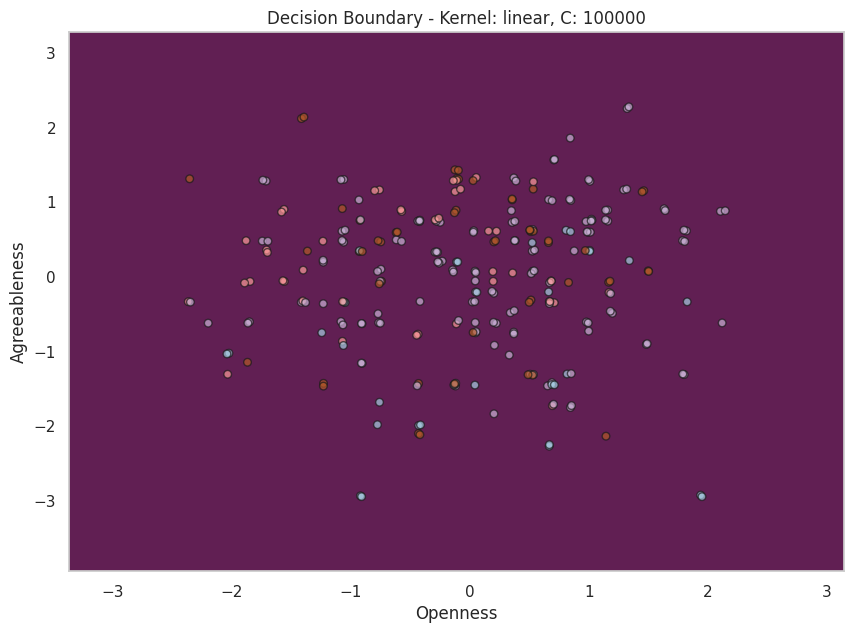

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'scatter_kwargs', 'show_title'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


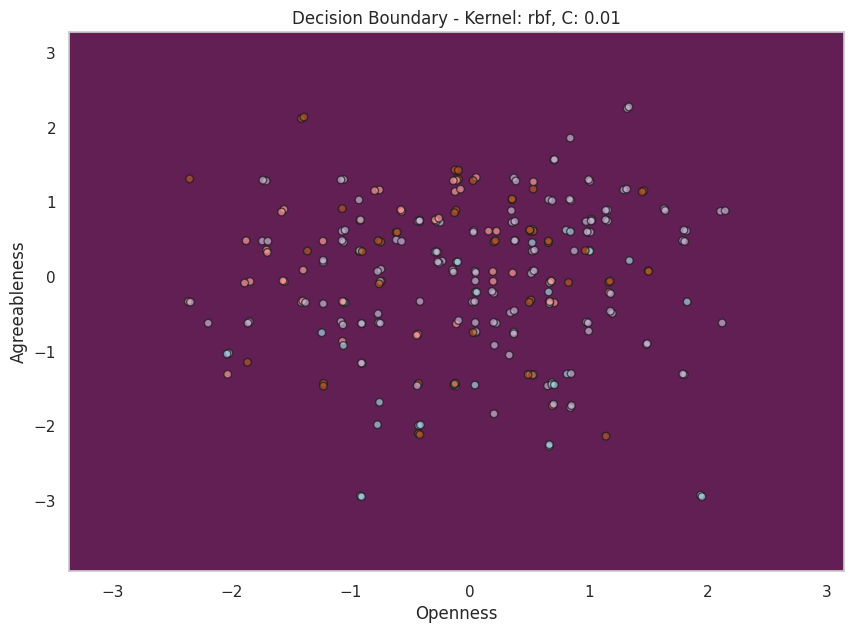

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'scatter_kwargs', 'show_title'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


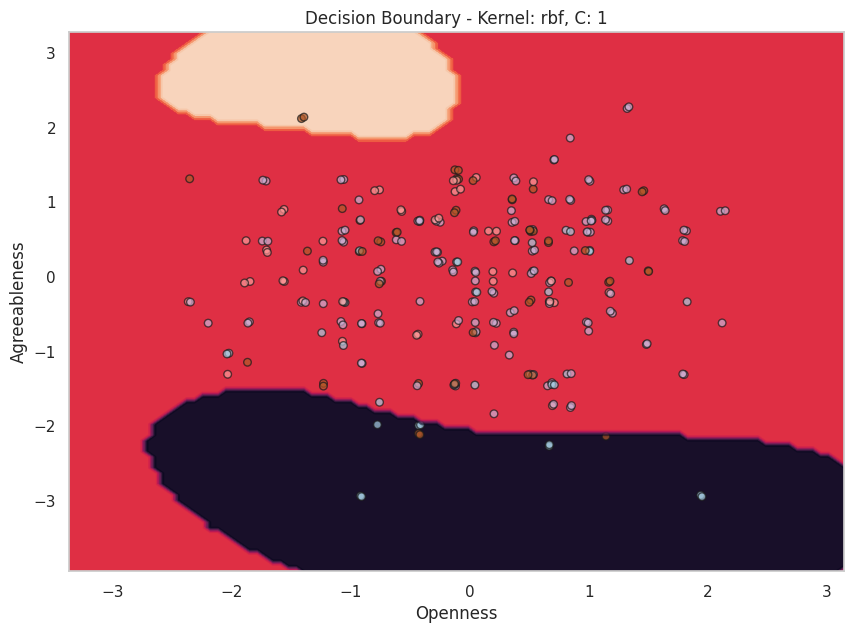

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'scatter_kwargs', 'show_title'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


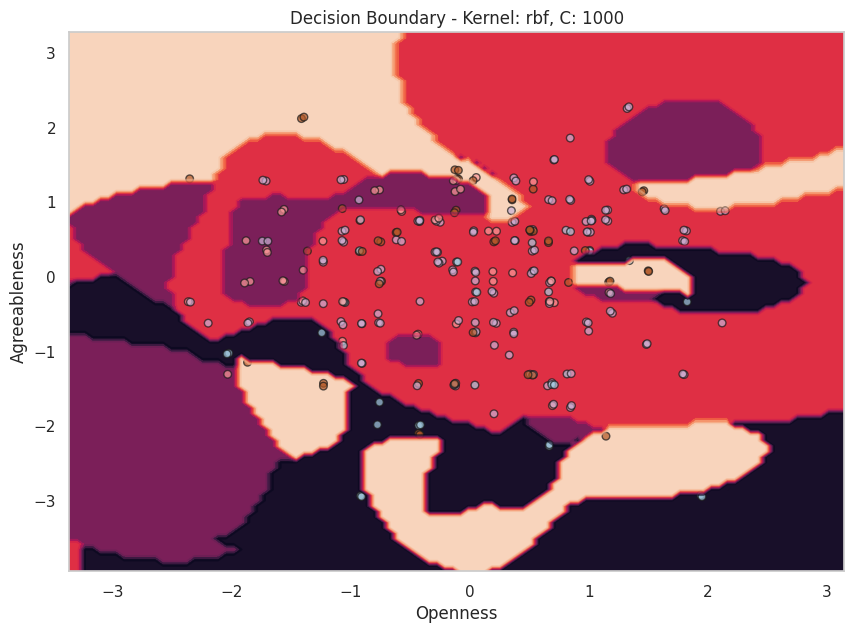

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'scatter_kwargs', 'show_title'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


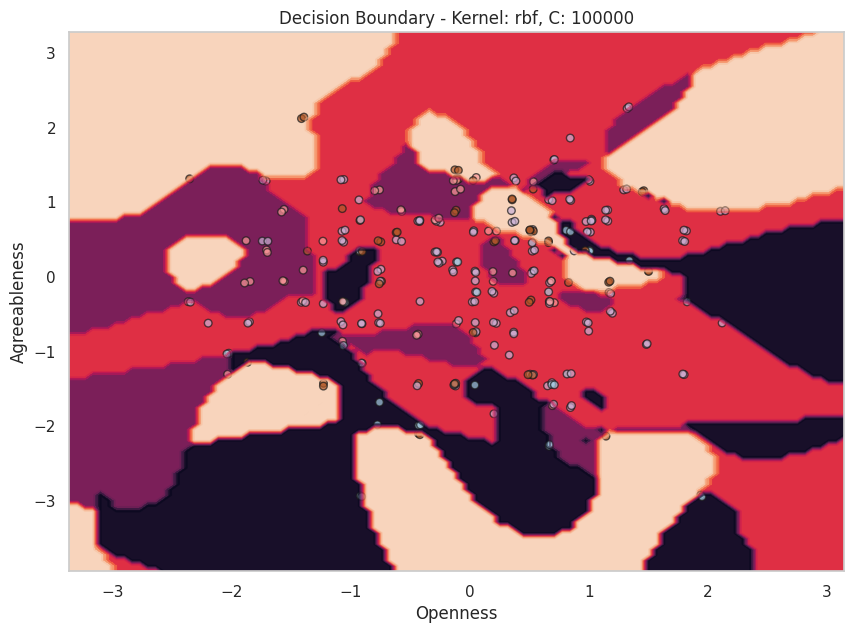

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Step 1: Choose two features from the set of five Big Five features
selected_features = ['Openness', 'Agreeableness']

# Step 2: Encode y set
label_encoder = LabelEncoder()
df['encoded_class'] = label_encoder.fit_transform(df['class'])

# Step 3: Create train and test datasets from X and encoded y
X = df[selected_features]
y = df['encoded_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test_size, random_state=random_state)

# Step 4: Scale features dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Create DecisionBoundaryDisplay for 6 SVC models
kernels = ['linear','rbf']
C_values = [0.01, 1, 1000, 100000]

for kernel in kernels:
    for C in C_values:
        # Create and fit the SVM model
        classifier = SVC(kernel=kernel, C=C).fit(X_train_scaled, y_train)

        # Create DecisionBoundaryDisplay
        disp = DecisionBoundaryDisplay.from_estimator(
            classifier,
            X_train_scaled,
            plot_method ='contour',
            response_method="predict",
            xlabel=selected_features[0],
            ylabel=selected_features[1],
            alpha=0.5,
        )
        # Plot original data as scatterplot
        ax=plt.gca()
        disp.plot(ax = ax, scatter_kwargs={'s': 30, 'edgecolors': 'k', 'alpha': 0.7}, show_title=False)
        ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.Paired,
                   edgecolor='k', s=30, alpha=0.7, label='Original Data Points')

        plt.title(f'Decision Boundary - Kernel: {kernel}, C: {C}')
        plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'degree'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'scatter_kwargs', 'show_title'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


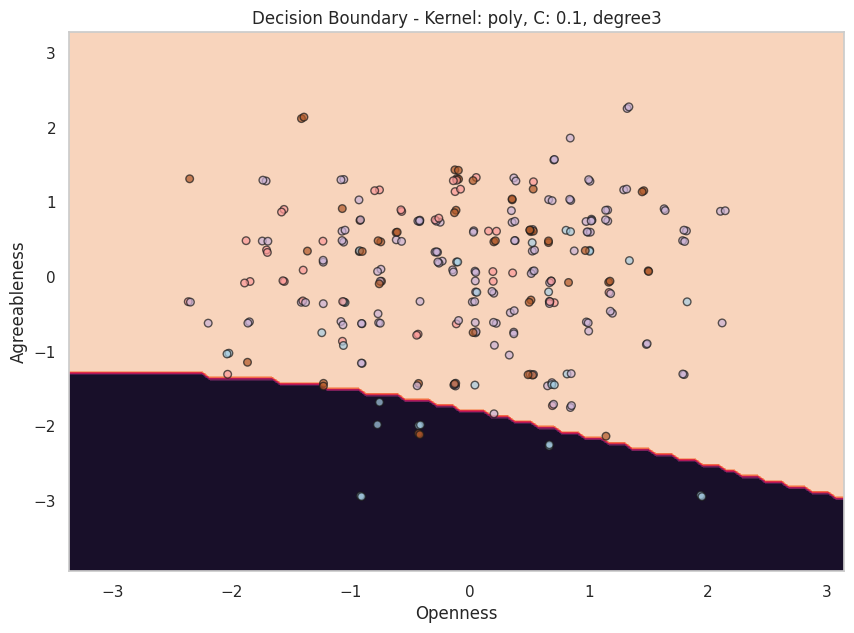

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'degree'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'scatter_kwargs', 'show_title'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


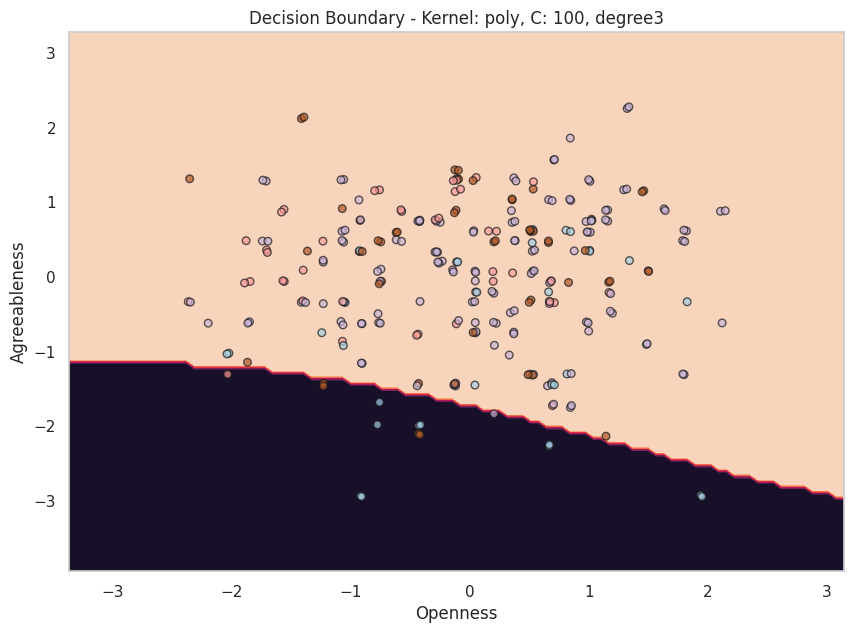

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'degree'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'scatter_kwargs', 'show_title'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


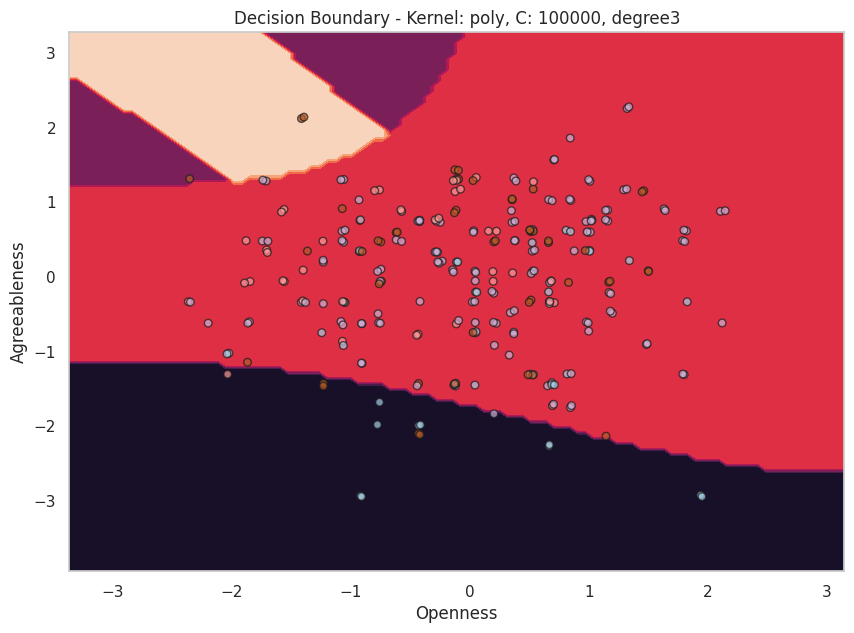

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'degree'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'scatter_kwargs', 'show_title'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


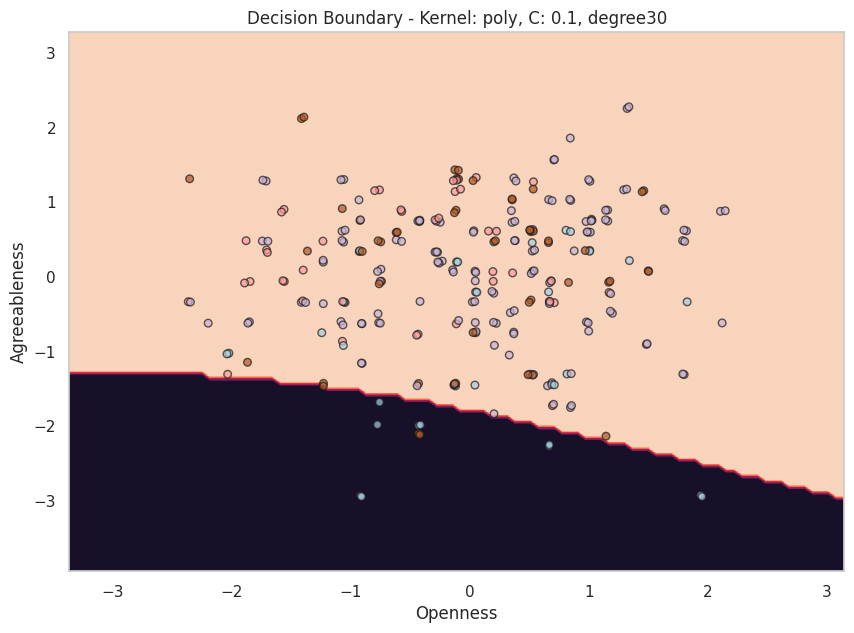

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'degree'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'scatter_kwargs', 'show_title'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


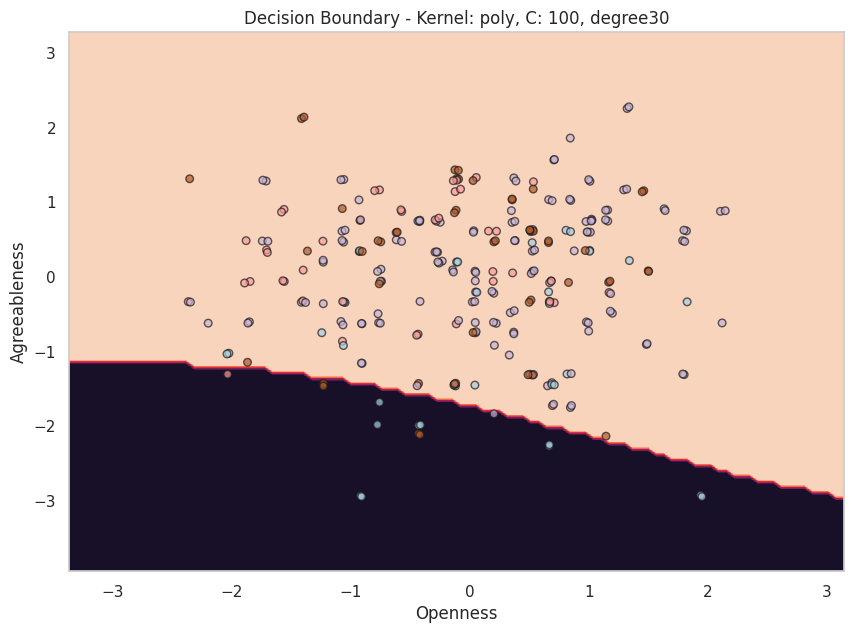

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'degree'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'scatter_kwargs', 'show_title'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


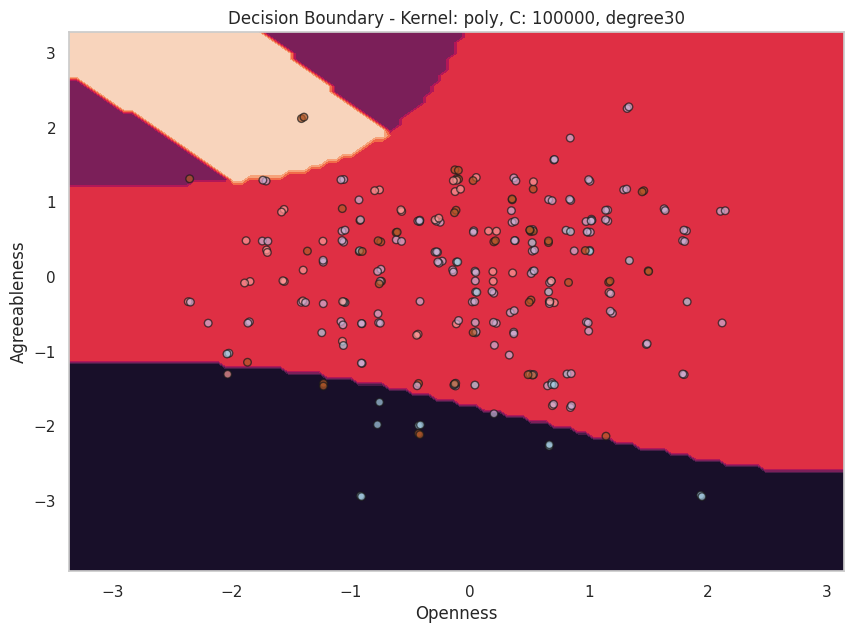

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'degree'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'scatter_kwargs', 'show_title'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


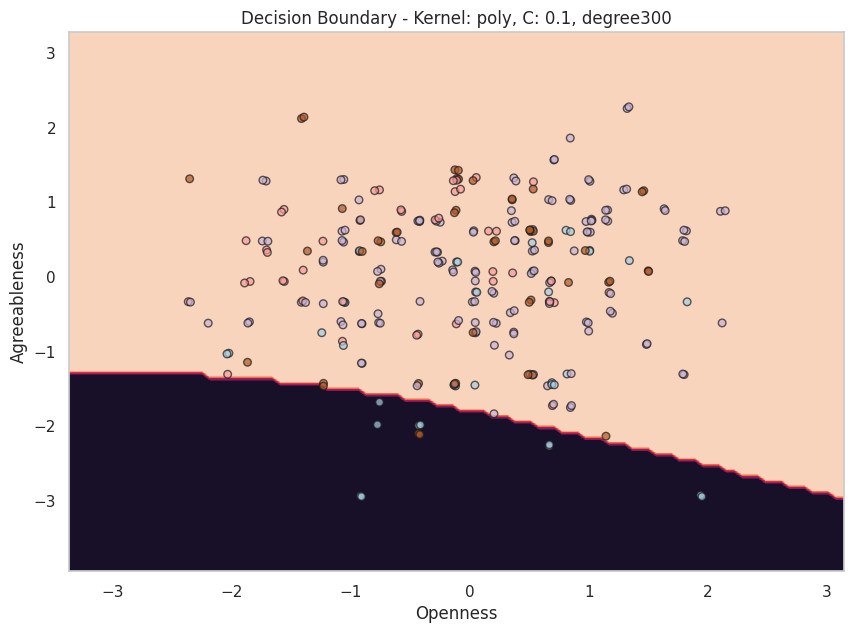

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'degree'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'scatter_kwargs', 'show_title'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


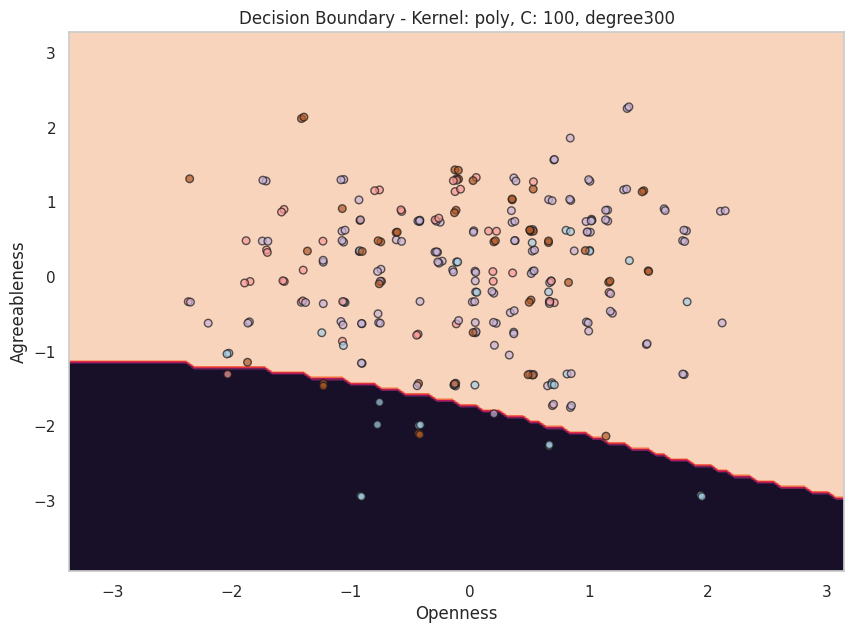

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'degree'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'scatter_kwargs', 'show_title'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


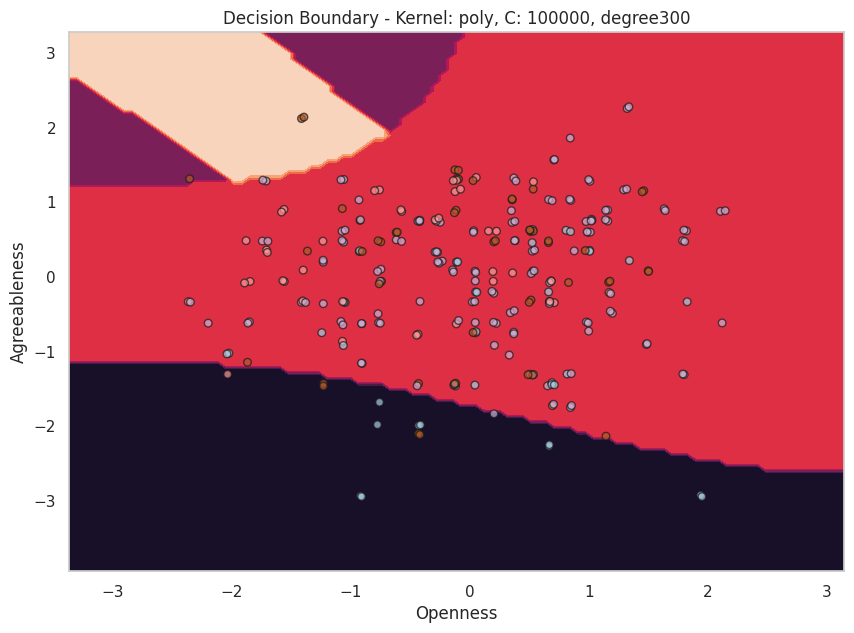

In [ ]:
C_values = [0.1, 100, 100000]
degrees = [3, 30, 300]
for degree in degrees:
  for C in C_values:
    classifier = SVC(kernel='poly', C=C).fit(X_train_scaled, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        classifier,
        X_train_scaled,
        degree = degree,
        response_method="predict",
        xlabel=selected_features[0],
        ylabel=selected_features[1],
        alpha=0.5,
        )
    ax=plt.gca()
    disp.plot(ax=ax, scatter_kwargs={'s': 30, 'edgecolors': 'k', 'alpha': 0.7}, show_title=False)
    ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.Paired,
                    edgecolor='k', s=30, alpha=0.7, label='Original Data Points')
    plt.title(f'Decision Boundary - Kernel: poly, C: {C}, degree{degree}')
    plt.show()